# Análise Bivariada

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy

**Lendo os dados**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maria-n-ramos/Estatistica/refs/heads/main/Analise%20Exploratoria%20de%20Dados/dados.txt', sep='\t')
df.head()

,Id,SB,Idade,Altura(m),Peso(kg),Filhos,FumaCigarro,ToleranciaCigarro
0,1,Feminino,23,1.62,82,0.0,nao,Indiferente
1,2,Feminino,27,1.57,56,1.0,nao,Incomoda pouco
2,3,Masculino,34,1.84,123,0.0,nao,Incomoda muito
3,4,Feminino,19,1.69,100,0.0,nao,Incomoda pouco
4,5,Masculino,20,1.67,67,0.0,nao,Indiferente


## 1) Duas Qualitativas: FumaCigarro e ToleranciaCigarro

In [ ]:
matrix=pd.crosstab(df["FumaCigarro"],df["ToleranciaCigarro"],normalize="index").round(4)*100
numpy.transpose(matrix)

FumaCigarro,nao
ToleranciaCigarro,
Incomoda muito,26.67
Incomoda pouco,40.00
Indiferente,33.33


In [ ]:
from scipy.stats import chi2_contingency
# Calcular o coeficiente de contingência
contingency_matrix = numpy.transpose(matrix)
chi2, p, dof, expected = chi2_contingency(contingency_matrix)

# Exibir o coeficiente de contingência
contingency_coefficient = numpy.sqrt(chi2 / (chi2 + numpy.sum(expected)))
print('Coeficiente de contingência:', contingency_coefficient)

Coeficiente de contingência: 0.0


*são totalmente independentes*

# 2) Duas Variáveis Quantitativas: Filhos e Idade

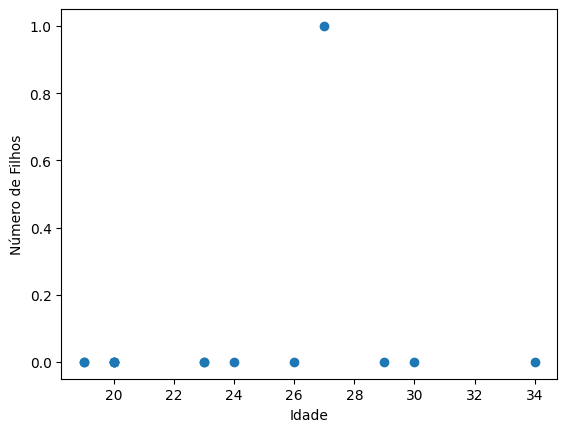

In [ ]:
import matplotlib.pyplot as plt
# Criar o gráfico de dispersão
plt.scatter(df["Idade"], df["Filhos"])
# Adicionar rótulos aos eixos
plt.xlabel('Idade')
plt.ylabel('Número de Filhos')
# Exibir o gráfico
plt.show()

In [ ]:
from scipy.stats import pearsonr
#novo dataframe sem o missing em filhos
Idade = df["Idade"][0:13]
Filhos = df["Filhos"][0:13]
# Calcular o coeficiente de correlação de Pearson
corr, p_value = pearsonr(Idade, Filhos)
# Exibir o resultado
print('Coeficiente de correlação de Pearson:', corr)
print('Valor de p:', p_value)

Coeficiente de correlação de Pearson: 0.1790639371095376
Valor de p: 0.5583226976428176


*correlação muito fraca*

# 3) Uma Variável Quantitativa e uma Qualitativa

In [ ]:
from scipy.stats import f_oneway
# Realizar a ANOVA
grupo_a = df[df['SB'] == 'Feminino']['Peso(kg)']
grupo_b = df[df['SB'] == 'Masculino']['Peso(kg)']

f_statistic, p_value = f_oneway(grupo_a, grupo_b)

# Exibir os resultados da ANOVA
print('Estatística F:', f_statistic)
print('Valor-p:', p_value)

# Realizar a análise das estatísticas
alpha = 0.05

if p_value < alpha:
    print("Há evidências estatísticas para rejeitar a hipótese nula.")
    print("Indica que há diferenças significativas entre os grupos.")
else:
    print("Não há evidências estatísticas para rejeitar a hipótese nula.")
    print("Não há diferenças significativas entre os grupos.")

Estatística F: 0.9217084570855263
Valor-p: 0.3545437154596239
Não há evidências estatísticas para rejeitar a hipótese nula.
Não há diferenças significativas entre os grupos.


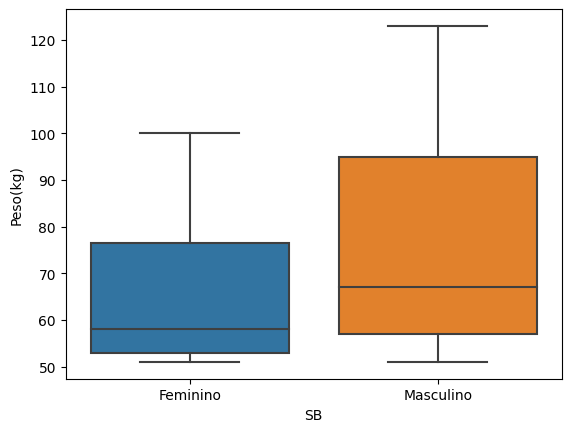

In [ ]:
import seaborn as sns
sns.boxplot(x=df["SB"], y=df["Peso(kg)"], data=df)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#retirar a unidade de medida da variável peso
df.rename(columns={'Peso(kg)': 'Peso'}, inplace=True)
# Ajustar o modelo de ANOVA
modelo_anova = ols('Peso ~ C(SB)', data=df).fit()

# Calcular o R² ajustado
r_squared_adj = modelo_anova.rsquared_adj

# Exibir o R² ajustado
print('Coeficiente de determinação R² ajustado:', r_squared_adj)

Coeficiente de determinação R² ajustado: -0.005623702231360994


*O modelo de regressão linear ajustado não é capaz de explicar a variabilidade dos dados de forma significativa. Essencialmente, isso significa que as variáveis independentes do modelo não estão contribuindo para a explicação da variabilidade na variável dependente. Olhar também o negativo*